## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


Chapter 1: Business Overview


1.1   Introduction


The real estate market is a complex and dynamic environment where accurately pricing houses is of paramount importance. In this ever-changing landscape, homeowners, buyers, and real estate agencies are often faced with the challenge of determining the fair market value of a property. The consequences of inaccurate pricing can be significant, ranging from houses languishing on the market for extended periods to missed opportunities for maximizing profit.
The quest for a precise and data-driven solution to this challenge has led us to explore a predictive model using linear regression. By leveraging the power of data analysis and predictive modeling, we aim to provide a practical tool that can revolutionize the way houses are priced, making the process more transparent, efficient, and informed.


1.2   Challenges


The challenges in the real estate market are multifaceted. Real estate agencies often grapple with two primary issues: overpricing and the lack of a robust decision framework. Overpricing can lead to properties remaining unsold for prolonged periods, incurring additional costs, and diminishing potential profits. On the other hand, prospective buyers face difficulties in determining which properties align with their budgets and desired features.


1.3    Problem Statement


The core problem that our project addresses is to provide a suburban house pricing model that considers the features of a house to determine its value. Overpricing can be detrimental to both sellers and buyers. The absence of a reliable decision framework means that clients with varying budgets and preferences lack guidance in their property search. As such, there is a clear need for a data-driven solution that can provide precise house price predictions and, in doing so, mitigate the challenges faced by stakeholders in the real estate market.


Objectives

Primary Objective: Develop a robust linear regression model to accurately predict suburban house prices in King County, Washington, utilizing relevant variables from the dataset. Therefore our objectives are: 

a). Develop a regression model to predict suburban house prices based on their features.


b). Identify Key Factors Influencing House Prices in King County, California, to provide valuable insights for precise pricing strategies.


c). Analyze Model Performance using metrics such as mean squared error, R-squared values, and residual analysis to gauge the model's effectiveness.


d). Provide Actionable Recommendations to the Real Estate Agency for improving profitability and market presence, leveraging insights from the model.






### 1.0 IMPORTING THE NECESSARY LIBRARIES AND LOADING THE DATASET

#### 1.2 IMPORTING THE NECESSARY LIBRARIES

In [1338]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import statsmodels.api as sm

# Project Libraries
# import functions as func

%matplotlib inline


#### 1.3 IMPORTING THE DATASET INTO A PANDAS DATAFRAME

In [1339]:
df = pd.read_csv('data\kc_house_data.csv')
df.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062


In [1340]:
df.tail(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,NO,NONE,...,7 Average,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [1341]:
df.shape

(21597, 21)

##### 
    A brief overview of the dataset shows that it has 21 columns and 21,567 rows. All of them have been successfully been loaded into the dataframe

### 2.0 DATA UNDERSTANDING 

#### 2.1 UNDERSTANDING THE CHARACTERISTICS OF THE DATASET

In [1342]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [1343]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront        object
view              object
condition         object
grade             object
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [1344]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [1345]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [1346]:
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [1347]:
df.duplicated().any()

False

#### 
    From the above overview, we have established that the dataset does not have any duplicated values. There are a few columns that have missing values (waterfront, view and yr_renovated). We also have categorical values and numerical values

## 3.0 DATA CLEANING

### 3.1 HANDLING MISSING VALUES

    We'll start with visualizing our data to see if it has any missing values

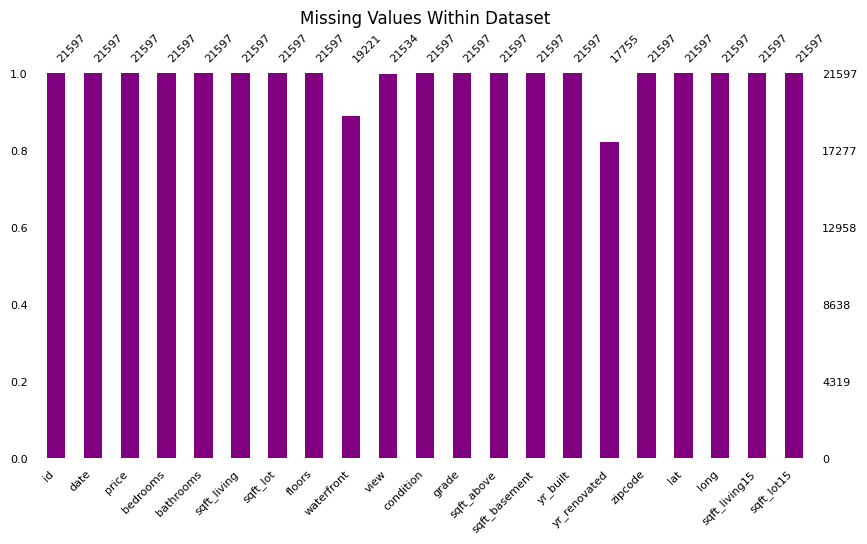

In [1348]:
# Visualise the missing values in the dataset
msno.bar(df, color='purple', figsize=(10, 5), fontsize=8)
plt.title('Missing Values Within Dataset')
plt.show()

    Lets find out how many each of the column has

In [1349]:
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

    We can see that the Waterfront, View (albeit few) and Yr_renovated have missing values
    Since the Waterfront and View column has many missing values, we cannot drop all of them, we can group the 
    values by their zipcodes and replace the values with the mode of each zipcode. It is reasonable 
    to assume that all houses in the same zipcode have similar properties as far as waterfront and a view is 
    concerned

#### 3.1.1. Missing values in categorical columns (waterfront and view)

In [1350]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

    Define a function that takes a dataframe, the column to group by and the target
     column as arguments and calculates the mode for the target column within each group
     and fills the missing vallues in the target column based on the mode within each group.

In [1351]:
def fill_missing_with_mode(df, group_by_column, target_column):
    # Group the DataFrame by the specified column and calculate the mode for the target column within each group
    mode_by_group = df.groupby(group_by_column)[target_column].agg(lambda x: x.mode().iloc[0])

    # Fill missing values in the target column based on the mode within each group
    for index, row in df.iterrows():
        if pd.isna(row[target_column]):
            df.at[index, target_column] = mode_by_group[row[group_by_column]]

# Example usage to fill missing 'waterfront' values based on 'zipcode' mode
# fill_missing_with_mode(df, 'zipcode', 'waterfront')


In [1352]:
# Use the function to fill missing 'waterfront' values based on 'zipcode' mode
fill_missing_with_mode(df, 'zipcode', 'waterfront')

In [1353]:
# Use the function to fill missing 'view' values based on 'zipcode' mode
fill_missing_with_mode(df, 'zipcode', 'view')

#### 3.1.2 Handling Missing Values in Numerical Columns (yr_renovated)

In [1354]:

# # Create a new column to represent the decade in which the house was built
# df['decade_built'] = (df['yr_built'] // 10) * 10

# # Group the DataFrame by 'decade_built' and calculate the mean 'yr_renovated' for each decade
# decade_renovation_means = df.groupby('decade_built')['yr_renovated'].mean().round().reset_index()

# # Rename the columns for clarity
# decade_renovation_means.columns = ['decade_built', 'mean_yr_renovated']

# # Merge the mean renovation years back into the original DataFrame
# df = df.merge(decade_renovation_means, on='decade_built', how='left')

# # Replace missing values in 'yr_renovated' with the corresponding mean value for each decade
# df['yr_renovated'] = df['yr_renovated'].fillna(df['mean_yr_renovated'])

# # Drop the temporary 'decade_built' and 'mean_yr_renovated' columns
# df.drop(['decade_built', 'mean_yr_renovated'], axis=1, inplace=True)


In [1355]:
# Fill missing values in the 'yr_renovated' column with 0
df['yr_renovated'].fillna(0, inplace=True)


#### 
    We have elected to fill all missing values in the yr_renovated column with '0'. 
    This is based on the assumption that those are houses that have missing values never been renovated. 
    We will feature engineer a new column in which houses will either be renovated or not. 
    This will eliminate the problem of likely bias that can arise when we fill the missing values

In [1356]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  object 
 9   view           21597 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

#### 3.2 DETECTING DUPLICATES

In [1357]:
df.duplicated().any()

False

#### 3.4 CHANGING SQFT_BASEMENT TO INT

In [1358]:
df['sqft_basement'] = df['sqft_basement'].replace('?', '0').astype('float')

    We do not have any duplicated values in the dataframe

#### 3.4 DETECTING OUTLIERS


#### 3.4.1 Numerical column Outliers

    In this section, i will only focus on numerical columns. 
    I will also exclude the following columns [id, lat, long] 
    because they are not expected to be used in model training. 
    They will be dropped at a later time.

####  
    This will plot box plots for the following numeircal columns. 
    columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
            'yr_built', 'sqft_above','lat', 'long', 'sqft_living15', 'sqft_lot15']

    
    


    We define a function to create a box plot for a specified column in the df with the necessary labels.

    the function will take the following Parameters:
    - data: The DataFrame containing the data (df).
    - column: The name of the column to create a box plot for.

    Returns:
    - The box plot as a Matplotlib Axes object.

In [1359]:

def create_box_plot(data, column):
 
    # Create a single subplot
    fig, ax = plt.subplots(figsize=(10, 5))
    
    # Plot the box plot
    sns.boxplot(x=data[column], ax=ax, orient='h')
    
    # Set the title and x-label based on the column name
    ax.set_title(f'Box Plot of {column}')
    ax.set_xlabel(column)
    
    return ax


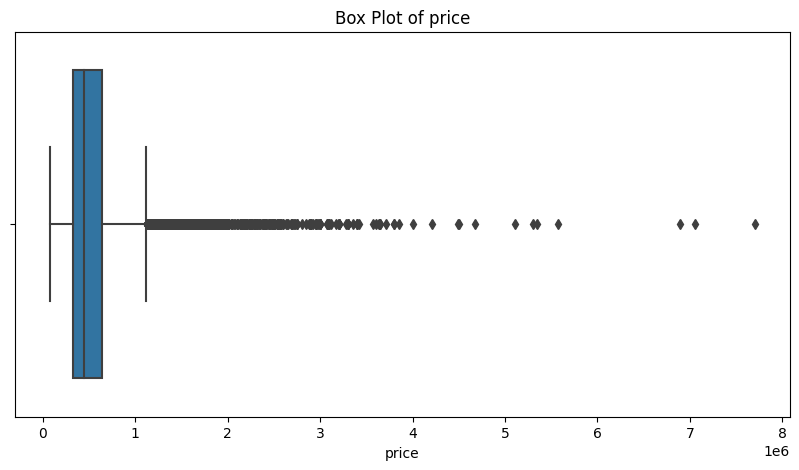

In [1360]:
# Create a box plot for the 'price' column
create_box_plot(df, 'price')
plt.show()

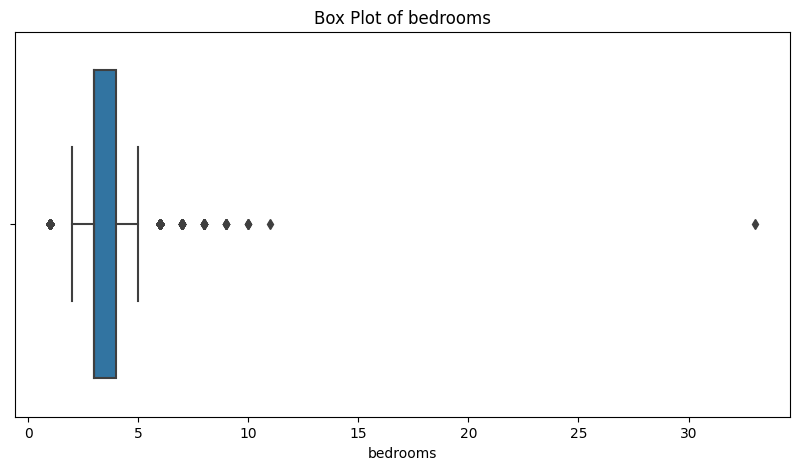

In [1361]:
# Create a box plot for the 'bedrooms' column
create_box_plot(df, 'bedrooms')
plt.show()

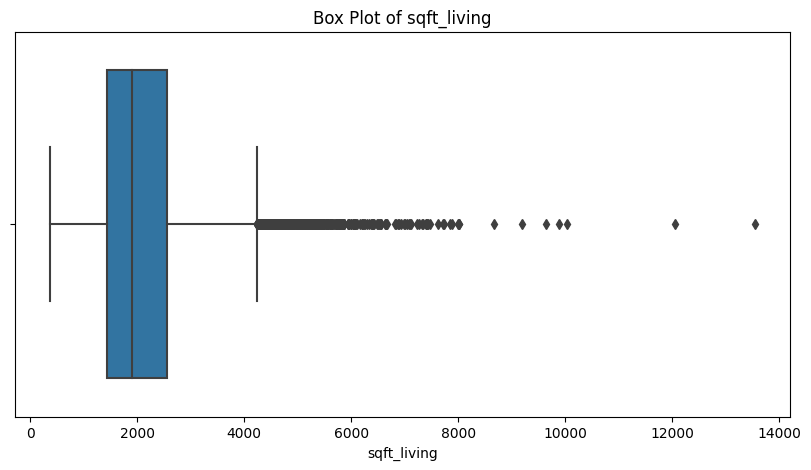

In [1362]:
# Create a box plot for the 'sqft_living' column
create_box_plot(df, 'sqft_living')
plt.show()

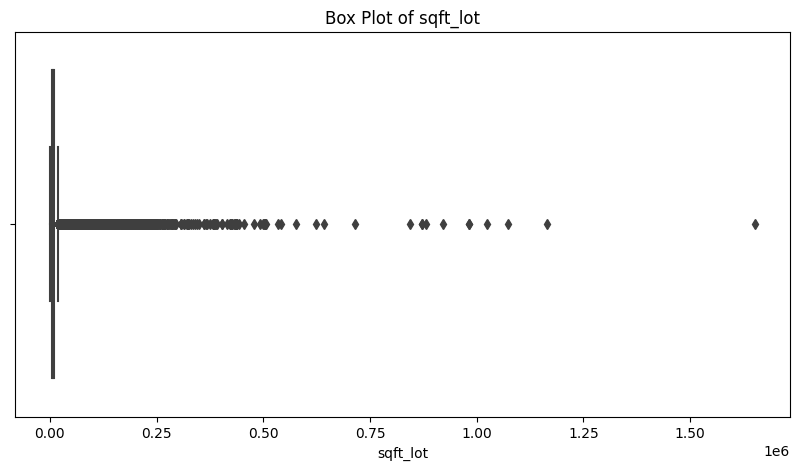

In [1363]:
# Create a box plot for the 'sqft_lot' column
create_box_plot(df, 'sqft_lot')
plt.show()

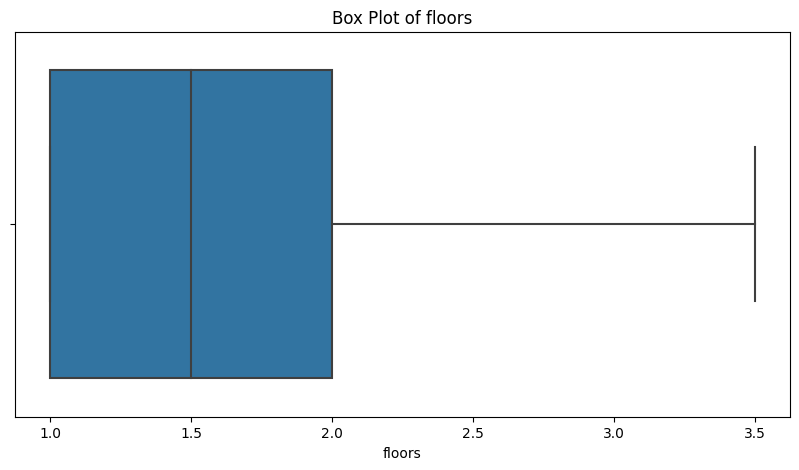

In [1364]:
# Create a box plot for the 'floor' column
create_box_plot(df, 'floors')
plt.show()

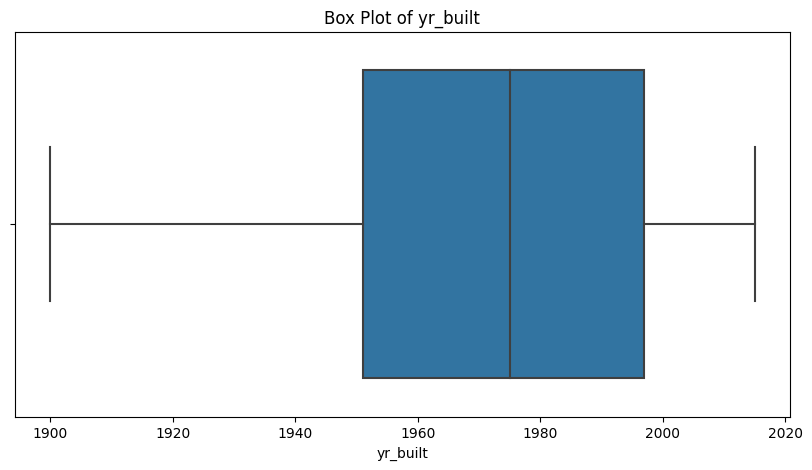

In [1365]:
# Create a box plot for the 'yr_built' column
create_box_plot(df, 'yr_built')
plt.show()

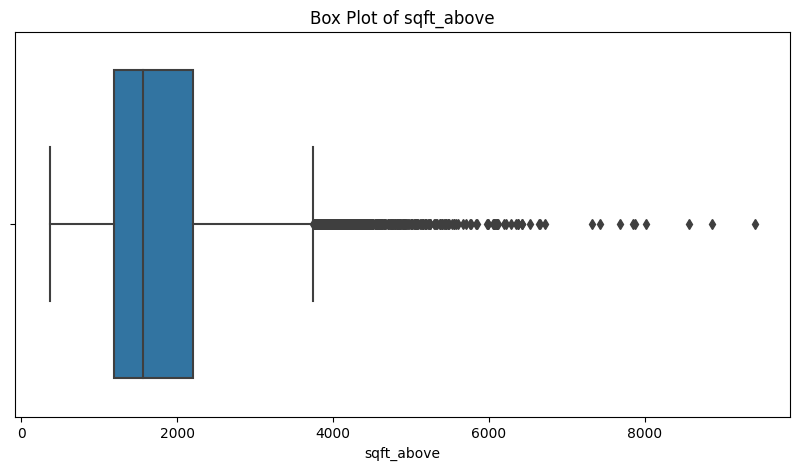

In [1366]:
# Create a box plot for the 'sqft_above' column
create_box_plot(df, 'sqft_above')
plt.show()

In [1367]:
# create_box_plot(df, 'yr_renovated')
# plt.show()

<Axes: title={'center': 'Box Plot of yr_renovated'}, xlabel='yr_renovated'>

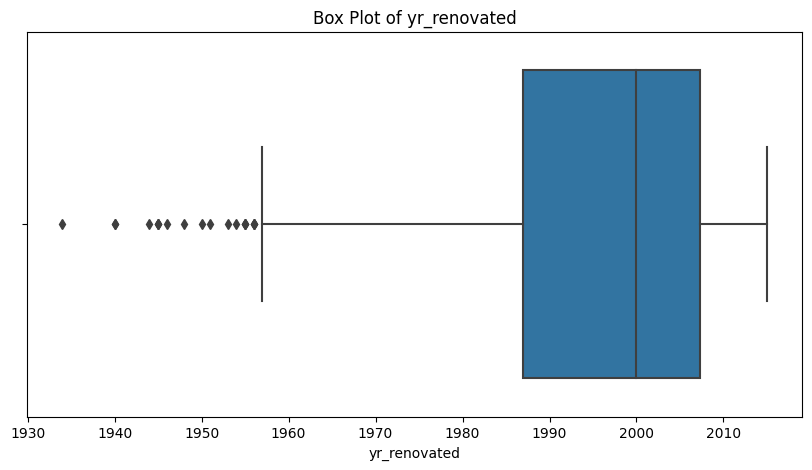

In [1368]:
# Apply the transformation and filtering to create df_filtered
df['yr_renovated'] = df['yr_renovated'] - (df['yr_built'].min() - 1900)
df_filtered = df[df['yr_renovated'] > 0]

# Call the create_box_plot function with df_filtered as the data
create_box_plot(df_filtered, 'yr_renovated')

#### 
    There are several outliers in each of the datasets. 
    We need to Drop some of the outliers to make sure we only deal with houses that are suburban.

## 4.0 EXPLORATORY DATA ANALYSIS

### 4.1.1 EXPLORING CATEGORICAL COLUMNS

    """
    Create a count plot for a specified categorical column in a given DataFrame.

    Parameters:
    - data: The DataFrame containing the data.
    - column: The name of the categorical column to create a count plot for.

    Returns:
    - The count plot as a Matplotlib Axes object.
    """

In [1369]:

def create_count_plot(data, column):

    # Create a single subplot
    fig, ax = plt.subplots(figsize=(10, 5))
    
    # Create the count plot
    sns.countplot(x=data[column], ax=ax)
    
    # Set the title and x-label based on the column name
    ax.set_title(f'Value Counts of {column}')
    ax.set_xlabel(column)
    ax.tick_params(axis='x', rotation=45)
    
    # Add labels displaying the total value counts for each bar
    for p in ax.patches:
        ax.annotate(f'Total: {p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=8, color='black', xytext=(0, 10),
                    textcoords='offset points')
    
    return ax


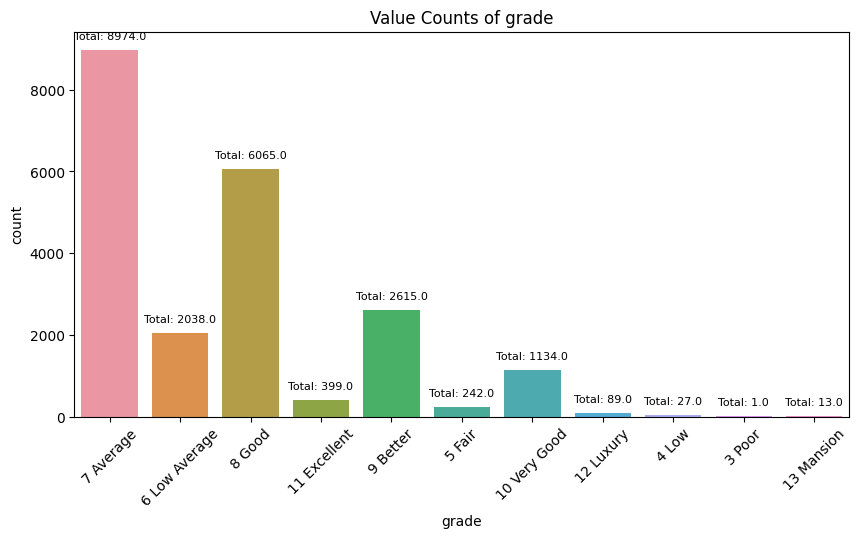

In [1370]:
# Create a count plot for the 'grade' column
create_count_plot(df, 'grade')
plt.show()

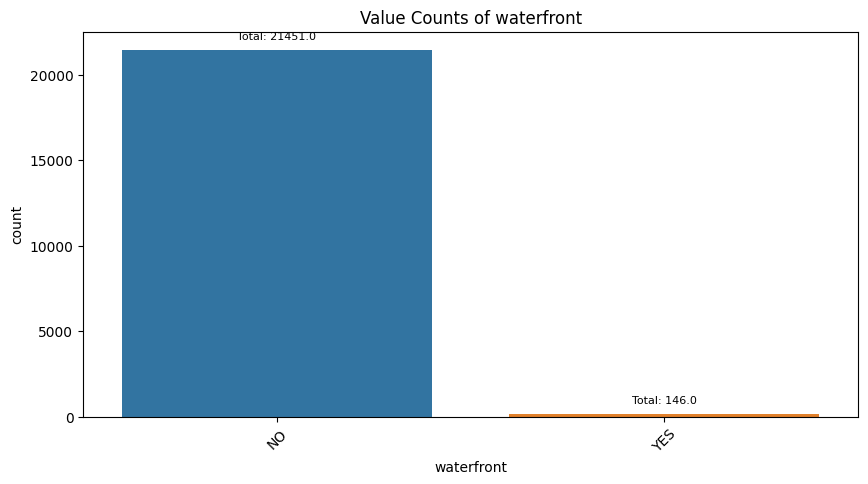

In [1371]:
# Create a count plot for the 'waterfront' column
create_count_plot(df, 'waterfront')
plt.show()

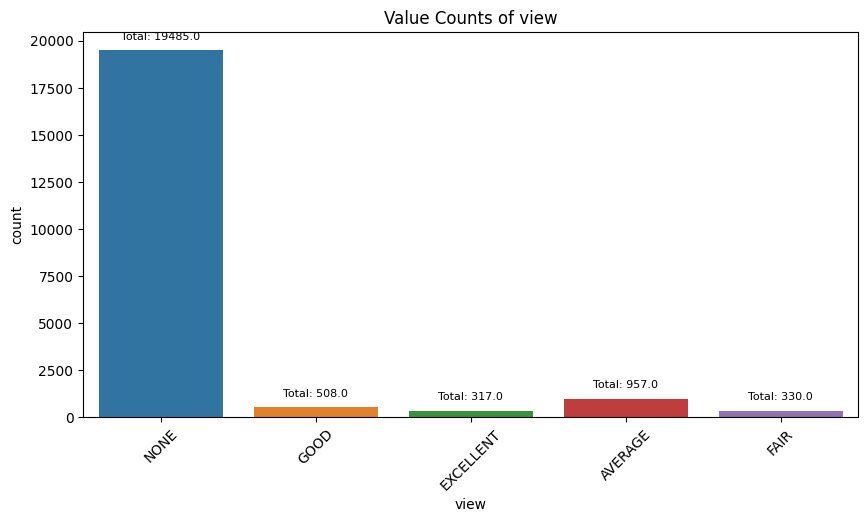

In [1372]:
# Create a count plot for the 'view' column
create_count_plot(df, 'view')
plt.show()

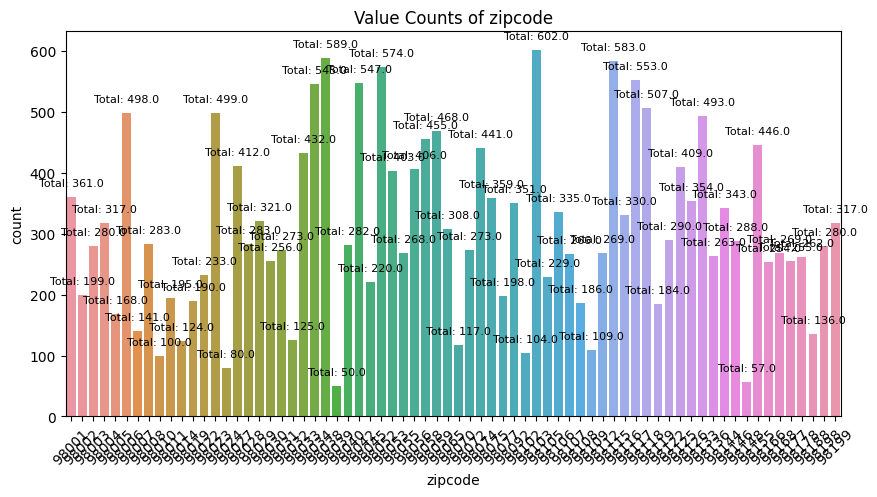

In [1373]:
# Create a count plot for the 'zipcode' column
create_count_plot(df, 'zipcode')
plt.show()

### 4.1.2 EXPLORING NUMERICAL COLUMNS (using Histoplot, countplot)

    """
    Create a customized plot for a specified column in a given DataFrame.

    Parameters:
    - data: The DataFrame containing the data.
    - plot_type: Type of plot (e.g., 'histplot', 'countplot', etc.).
    - column: The name of the column to create the plot for.
    - figsize: Tuple specifying the figure size (width, height).

    Returns:
    - The plot as a Matplotlib Axes object.
    """

In [1374]:


def create_custom_plot(data, plot_type, column, figsize=(10, 5)):

    # Create a single subplot
    fig, ax = plt.subplots(figsize=figsize)
    
    # Check the plot type and create the corresponding plot
    if plot_type == 'histplot':
        sns.histplot(data[column], kde=True, ax=ax)
    elif plot_type == 'countplot':
        sns.countplot(x=data[column], ax=ax)
    elif plot_type == 'rugplot':
        sns.rugplot(x=data[column], ax=ax)
    elif plot_type == 'ridgeplot':
        sns.kdeplot(x=data[column], ax=ax)
    elif plot_type == 'beanplot':
        sns.violinplot(x=data[column], ax=ax)
    
    # Set the title and x-label based on the column name
    ax.set_title(f'{plot_type.capitalize()} of {column}')
    ax.set_xlabel(column)
    
    # Additional customization based on the plot type can be added here
    
    return ax


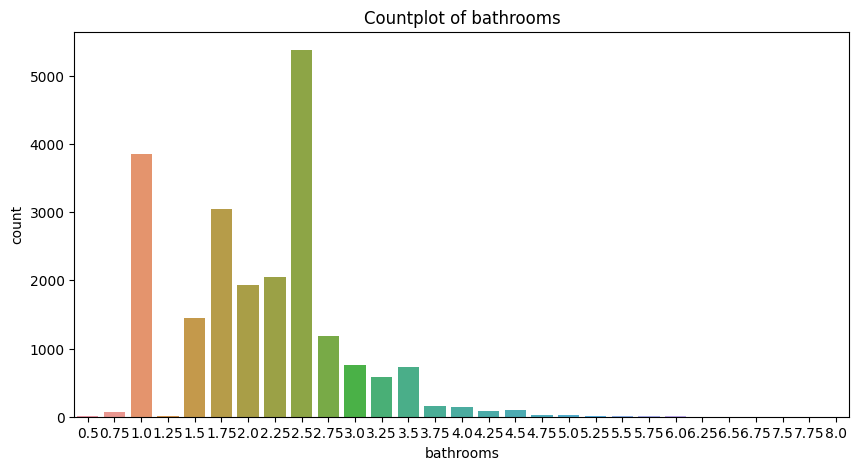

In [1375]:
# Create a count plot for the 'bathrooms' column
create_custom_plot(df, 'countplot', 'bathrooms')
plt.show()

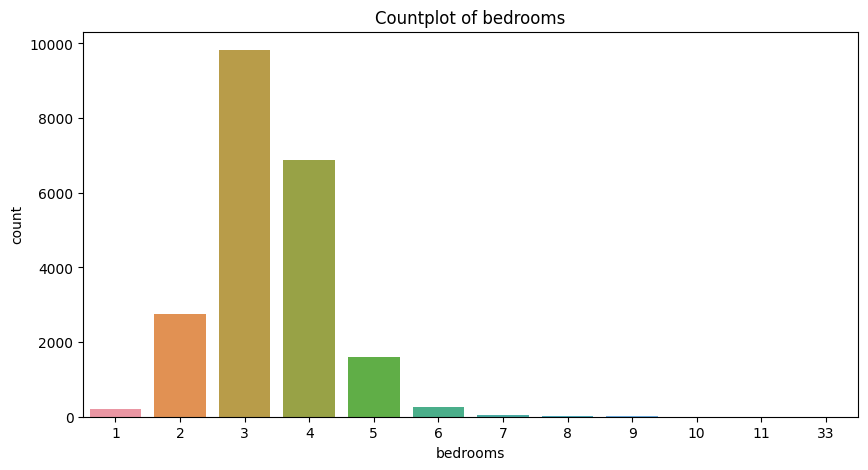

In [1376]:
# Create a count plot for the 'bedrooms' column
create_custom_plot(df, 'countplot', 'bedrooms')
plt.show()

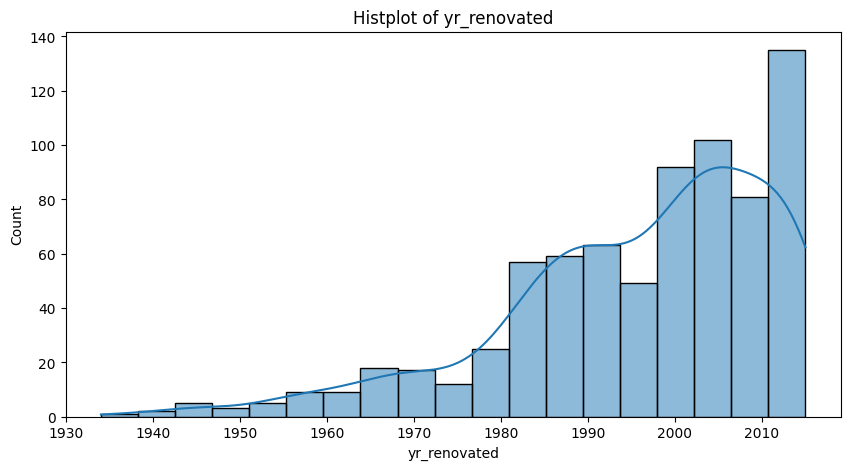

In [1377]:
# Create a count plot for the 'yr_renovated' column
create_custom_plot(df_filtered, 'histplot', 'yr_renovated')
plt.show()

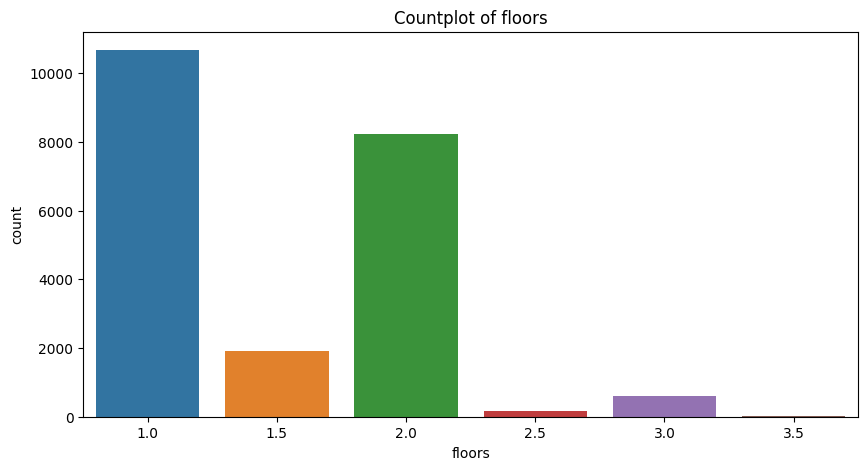

In [1378]:
# Create a count plot for the 'floors' column
create_custom_plot(df, 'countplot', 'floors')
plt.show()

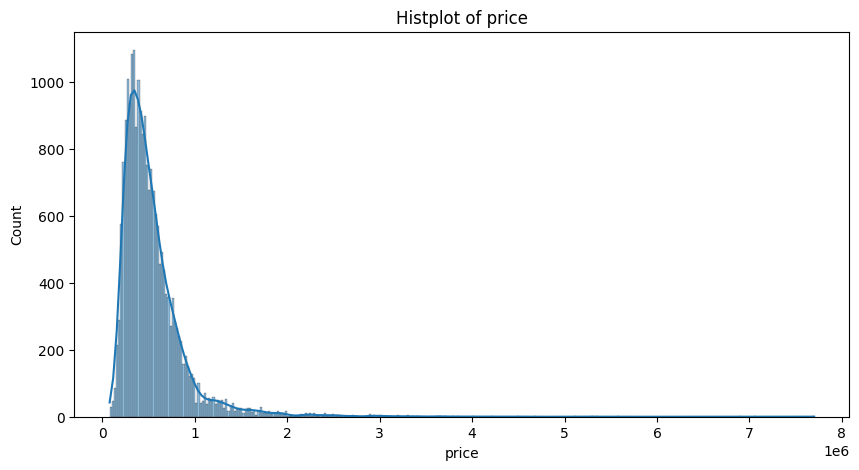

In [1379]:
# Create a histogram for the 'price' column
create_custom_plot(df, 'histplot', 'price')
plt.show()

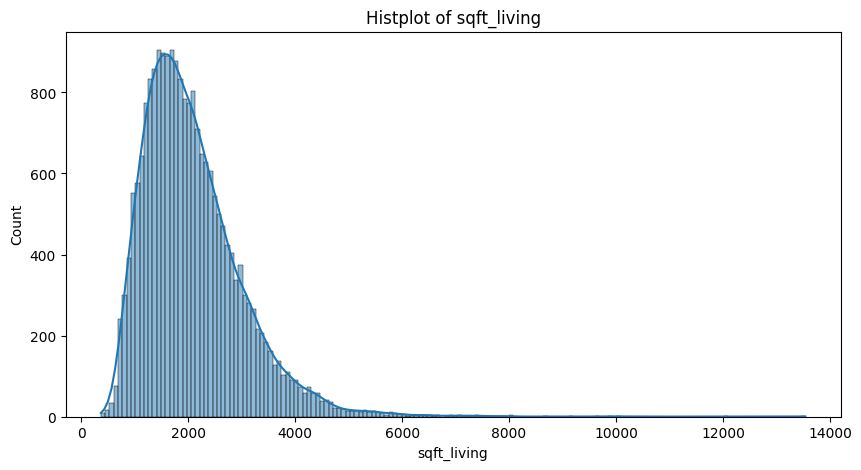

In [1380]:
# Create a histogram for the 'price' column
create_custom_plot(df, 'histplot', 'sqft_living')
plt.show()

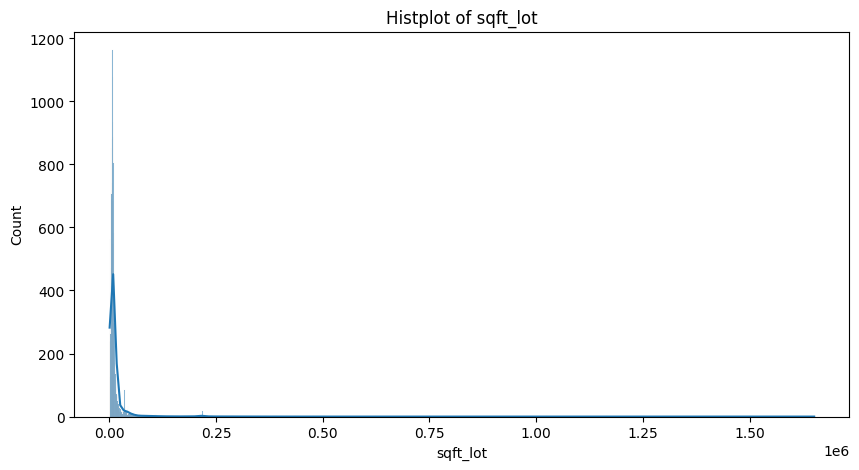

In [1381]:
# Create a histogram for the 'sqft_lot' column
create_custom_plot(df, 'histplot', 'sqft_lot')
plt.show()

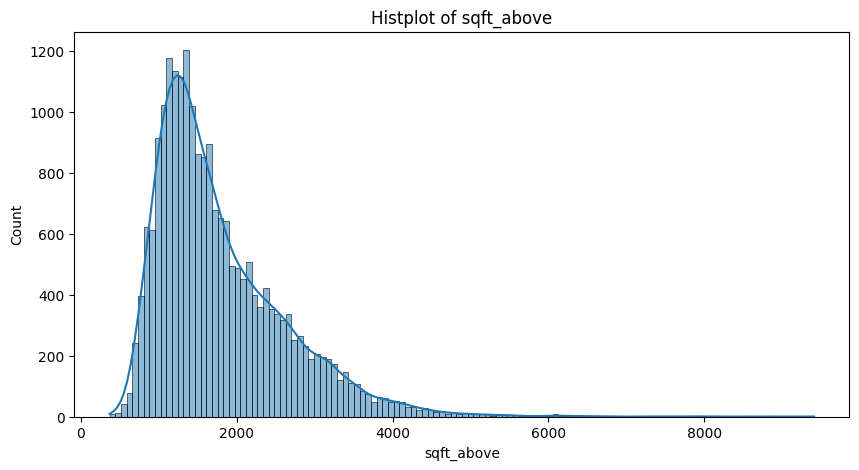

In [1382]:
# Create a histogram for the 'sqft_above' column
create_custom_plot(df, 'histplot', 'sqft_above')
plt.show()

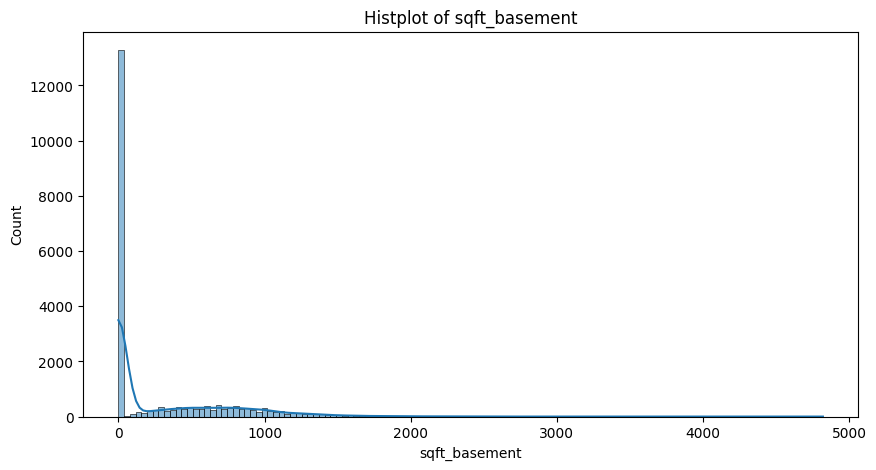

In [1383]:
# Create a histogram for the 'sqft_basement' column
create_custom_plot(df, 'histplot', 'sqft_basement')
plt.show()

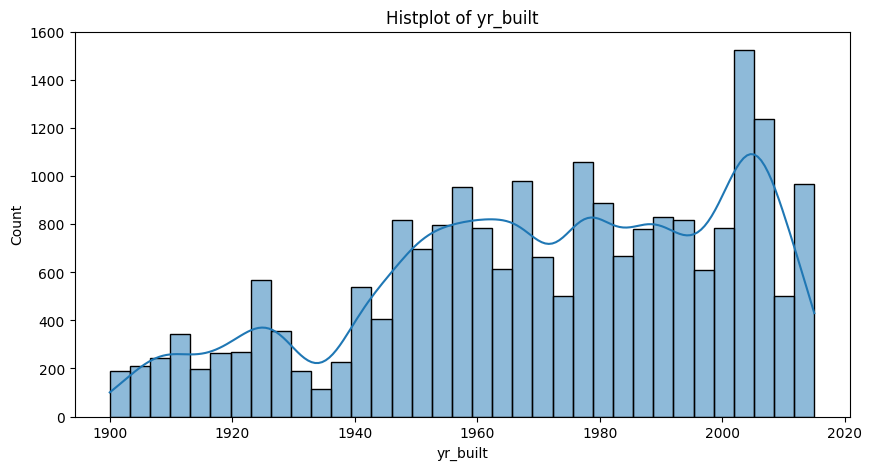

In [1384]:
# Create a histogram for the 'yr_built' column
create_custom_plot(df, 'histplot', 'yr_built')
plt.show()

## 5.0 DATA PREPARATION & FEATURE ENGINEERING

In [1385]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  object 
 9   view           21597 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

#### 5.1 ADDING NEW COLUMNS

In [1386]:
# Create a new df that we can drop columns and work with
new_df = df.copy()
# new_df.head(3)

#### 5.1.1 Adding Age Column

#### 
    Add a new column to store the age of the houses since it was built or renovated.

In [1387]:

# Convert 'date' column to a datetime data type 
new_df['date'] = pd.to_datetime(new_df['date'])

# Classify houses as renovated or not based on 'yr_renovated' column
new_df['renovated'] = 0  # Initialize all houses as not renovated
new_df.loc[new_df['yr_renovated'] > 0, 'renovated'] = 1  # Set 'renovated' to 1 for houses that have been renovated

# Calculate the age based on renovation or build date
def calculate_age(row):
    if row['renovated'] == 1:
        return row['date'].year - row['yr_renovated']
    else:
        return row['date'].year - row['yr_built']

new_df['age'] = new_df.apply(calculate_age, axis=1)

# 'age' now contains the age of the house based on renovation or build date
# there are some houses that were sold before they were finished or renovated (they have a -1) value of age, these houses will be assigned the value of 1 in age
# new_df['age'].replace(-1.0, 0, inplace=True)


In [1388]:
print (new_df.age.max(), new_df.age.min())

115.0 -1.0


In [1389]:
new_df[new_df['age'] == -1.0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,age
1761,1832100030,2014-06-25,597326.0,4,4.00,3570,8250,2.0,NO,NONE,...,710.0,2015,0.0,98040,47.5784,-122.226,2230,10000,0,-1.0
2293,8712100320,2014-07-28,585000.0,5,2.75,2350,4178,1.5,NO,NONE,...,830.0,1922,2015.0,98112,47.6388,-122.300,1920,4178,1,-1.0
2685,3076500830,2014-10-29,385195.0,1,1.00,710,6000,1.5,NO,NONE,...,0.0,2015,0.0,98144,47.5756,-122.316,1440,4800,0,-1.0
7090,9141100005,2014-10-28,285000.0,4,3.50,2770,10505,2.0,NO,NONE,...,0.0,1940,2015.0,98133,47.7412,-122.355,1760,10505,1,-1.0
7519,9520900210,2014-12-31,614285.0,5,2.75,2730,6401,2.0,NO,NONE,...,0.0,2015,0.0,98072,47.7685,-122.160,2520,6126,0,-1.0
8032,1250200495,2014-06-24,455000.0,2,1.50,1200,1259,2.0,NO,NONE,...,200.0,2015,0.0,98144,47.6001,-122.298,1320,1852,0,-1.0
11587,7284900030,2014-05-22,850000.0,4,3.25,3090,6744,2.0,NO,EXCELLENT,...,0.0,1923,2015.0,98177,47.7680,-122.388,2020,6656,1,-1.0
14475,2770601530,2014-08-26,500000.0,2,2.25,1570,1269,2.0,NO,NONE,...,290.0,2015,0.0,98199,47.6514,-122.385,1570,6000,0,-1.0
14845,3585900665,2014-06-06,805000.0,5,2.50,4600,19831,1.0,NO,GOOD,...,2300.0,1956,2015.0,98177,47.7608,-122.378,2890,19831,1,-1.0
15673,3585900190,2014-10-06,825000.0,3,2.50,3400,38400,1.0,NO,EXCELLENT,...,1530.0,1955,2015.0,98177,47.7611,-122.372,3400,24338,1,-1.0


#### 
    Some houses seem to have been sold before they were built or have a yr_renovated column and they were renovated after they were sold. 
    These may influence our model negaitvely, so we elect to drop them

In [1390]:
# Filter the DataFrame to exclude rows where 'age' is -1.0
new_df = new_df[new_df['age'] != -1.0]

In [1391]:
print (new_df.age.max(), new_df.age.min())

115.0 0.0


###  5.1.2 Adding Renovated Column
    Removing null values in the 'yr_built" column and adding 
    the 'renovated' column to show whether the house has been renovated or not

In [1392]:
new_df.loc[new_df.yr_renovated.isnull(), 'yr_renovated'] = 0
new_df['renovated'] = new_df['yr_renovated'].apply(lambda x: 0 if x == 0 else 1)
# new_df.renovated

### 5.1.3 Adding Total Square Footage Column
    Add a new column of Total Square Footage of the House

In [1393]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21579 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21579 non-null  int64         
 1   date           21579 non-null  datetime64[ns]
 2   price          21579 non-null  float64       
 3   bedrooms       21579 non-null  int64         
 4   bathrooms      21579 non-null  float64       
 5   sqft_living    21579 non-null  int64         
 6   sqft_lot       21579 non-null  int64         
 7   floors         21579 non-null  float64       
 8   waterfront     21579 non-null  object        
 9   view           21579 non-null  object        
 10  condition      21579 non-null  object        
 11  grade          21579 non-null  object        
 12  sqft_above     21579 non-null  int64         
 13  sqft_basement  21579 non-null  float64       
 14  yr_built       21579 non-null  int64         
 15  yr_renovated   21579 non

In [1394]:
#### Adding a Total Square Footage of House (total sqft_living + total_sqft basement)
# Add a new column 'total_sqft_house' by summing 'sqft_living' and 'sqft_basement'
new_df['total_sqft_house'] = new_df['sqft_living'] + new_df['sqft_basement']


### 5.1.4 Adding a Price/Square Ft 

In [1395]:

# Add a new column 'price_per_total_sqft_house' by dividing 'price' by 'total_sqft_house'
new_df['price_per_sqft'] = new_df['price'] / new_df['total_sqft_house']


### 5.1.5 Adding a Average Price of House per Zipcode

In [1396]:
# Calculate the average price per zipcode and create a new column to hold this information
average_prices_by_zipcode = new_df.groupby('zipcode')['price'].mean().reset_index()

# Rename the columns for clarity
average_prices_by_zipcode.columns = ['zipcode', 'average_price_per_zipcode']

# Merge the average prices back into the original DataFrame based on 'zipcode'
new_df = new_df.merge(average_prices_by_zipcode, on='zipcode', how='left')


In [1397]:
## average price of house per zipcode

### 5.1.5 Add a Has_Basement Column 
    Change the has_basement to a binary value

In [1398]:
# new_df['sqft_basement'] =new_df['sqft_basement'].replace('?', '0').astype('float')
new_df['has_basement'] = new_df['sqft_basement'].apply(lambda x: 0 if x == 0 else 1)


In [1399]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21579 entries, 0 to 21578
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id                         21579 non-null  int64         
 1   date                       21579 non-null  datetime64[ns]
 2   price                      21579 non-null  float64       
 3   bedrooms                   21579 non-null  int64         
 4   bathrooms                  21579 non-null  float64       
 5   sqft_living                21579 non-null  int64         
 6   sqft_lot                   21579 non-null  int64         
 7   floors                     21579 non-null  float64       
 8   waterfront                 21579 non-null  object        
 9   view                       21579 non-null  object        
 10  condition                  21579 non-null  object        
 11  grade                      21579 non-null  object        
 12  sqft

#### 5.2 DROPPING THE COLUMNS THAT WE BELIEVE WILL NOT BE NECESSARY TO OUR MODEL BAED ON THEIR CORRELATION WITH PRICE
    In our model we want to drop all the columns that we do not believe contribute to our model's
    performance. We are focused on using features pertinent to each house irrespective of its 
    geographic location or characteristics of neighbouring houses. 
    long and lat columns have geographical and should we need to consider location
    properties we use zipcode
    sqft_living 15 and sqft_lot contain details of the nearest 15 neighbors. These are not
    directly features of each house in our dataset
    Therefore, we'll drop
        sqft_living15,
        sqft_lot15
        long
        lat


#### 
    Any feature with a correlation of less that 0.3 with price and cannot be used to engineer new features price will be dropped

In [1400]:
# Select all numeric columns (excluding 'price')
numeric_cols = new_df.select_dtypes(include=[np.number])

# Calculate correlations with 'price' and sort in descending order
correlations = numeric_cols.corr()['price'].sort_values(ascending=False)

# Print the sorted correlations
print(correlations)

price                        1.000000
sqft_living                  0.702251
total_sqft_house             0.668522
average_price_per_zipcode    0.638419
sqft_above                   0.605564
sqft_living15                0.585234
bathrooms                    0.526141
price_per_sqft               0.458445
sqft_basement                0.321136
bedrooms                     0.308914
lat                          0.306758
floors                       0.257284
has_basement                 0.178277
yr_renovated                 0.117922
renovated                    0.117603
sqft_lot                     0.089835
sqft_lot15                   0.082809
yr_built                     0.054240
long                         0.022042
id                          -0.016652
zipcode                     -0.053448
age                         -0.097616
Name: price, dtype: float64


### 
    DROP ALL COLUMNS THAT CANNOT BE USED TO ENGINEER OTHER FEATURES AND HAVE A >2 CORRELATION WITH PRICE
    These columns include:
        has_basement                 0.178277
        yr_renovated                 0.117922
        renovated                    0.117603
        sqft_lot                     0.089835
        sqft_lot15                   0.082809
        yr_built                     0.054240
        long                         0.022042
        id                          -0.016652
        zipcode                     -0.053448
        age                         -0.097616

    The other features that have a low correlation to price will be used to engineer new features and subswquently dropped

In [1401]:
# Assuming 'df' is your original DataFrame
columns_to_drop = ['has_basement', 'yr_renovated', 'renovated', 'sqft_lot', 'sqft_lot15', 'yr_built', 'long', 'lat', 'id', 'zipcode', 'age' ]

# Create a new copy of the data while dropping the specified columns
new_df = new_df.drop(columns = columns_to_drop, axis=1).copy()

# 'new_df' is a copy of the data without the specified columns


In [1402]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  object 
 9   view           21597 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

##### 
    The original dataframe has 20 columns without feature engineering. 
    This dataframe will remain accessible should we need to use any element from it in other tasks down the line


In [1403]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21579 entries, 0 to 21578
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       21579 non-null  datetime64[ns]
 1   price                      21579 non-null  float64       
 2   bedrooms                   21579 non-null  int64         
 3   bathrooms                  21579 non-null  float64       
 4   sqft_living                21579 non-null  int64         
 5   floors                     21579 non-null  float64       
 6   waterfront                 21579 non-null  object        
 7   view                       21579 non-null  object        
 8   condition                  21579 non-null  object        
 9   grade                      21579 non-null  object        
 10  sqft_above                 21579 non-null  int64         
 11  sqft_basement              21579 non-null  float64       
 12  sqft

#### 
    The new df (new_df) has 15 columns which are listed above. 

### ORDINAL ENCODING 

##### 
    Create a function that maps ordinal values into a dataframe 
    with the corresponding numerical values based on a provided dictionary

In [1404]:
def map_ordinal_values(df, col_name, value_dict):
    # map the ordinal values to numerical values using the provided dictionary
    df[col_name] = df[col_name].map(value_dict).astype(int)
    return df

In [1405]:
print(new_df.condition.unique())

['Average' 'Very Good' 'Good' 'Poor' 'Fair']


In [1406]:
condition_dict = {'Poor': 1, 'Fair': 2, 'Average': 3, 'Good': 4, 'Very Good': 5}
grade_dict = {'3 Poor': 3, '4 Low': 4, '5 Fair': 5, '6 Low Average': 6, '7 Average': 7, '8 Good': 8, '9 Better': 9, '10 Very Good': 10, '11 Excellent': 11, '12 Luxury': 12, '13 Mansion': 13}
view_dict = {'NONE':0, 'AVERAGE':1, 'GOOD': 2, 'FAIR':3, 'EXCELLENT':4}
new_df = map_ordinal_values(new_df, 'condition', condition_dict)
new_df = map_ordinal_values(new_df, 'grade', grade_dict)
new_df = map_ordinal_values(new_df, 'view', view_dict)

# print(new_df[['condition', 'grade', 'view']])

In [1407]:
# def convert_column_data_type(df, column_name, new_data_type):
#     try:
#         df[column_name] = df[column_name].astype(new_data_type)
#     except ValueError:
#         print(f"Conversion to {new_data_type} failed. Check the data in the column.")
#         # You can handle the error as needed, e.g., return an error code or message

In [1408]:
# Example usage:
# Assuming you have a DataFrame 'df' and want to convert the 'age' column to float
# convert_column_data_type(new_df, 'condition', int)

In [1409]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21579 entries, 0 to 21578
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       21579 non-null  datetime64[ns]
 1   price                      21579 non-null  float64       
 2   bedrooms                   21579 non-null  int64         
 3   bathrooms                  21579 non-null  float64       
 4   sqft_living                21579 non-null  int64         
 5   floors                     21579 non-null  float64       
 6   waterfront                 21579 non-null  object        
 7   view                       21579 non-null  int32         
 8   condition                  21579 non-null  int32         
 9   grade                      21579 non-null  int32         
 10  sqft_above                 21579 non-null  int64         
 11  sqft_basement              21579 non-null  float64       
 12  sqft

#### ONE HOT ENCODING 

#### 
    One hot encoding will be done for he waterfront and the view column. 
    To avoid the 'Dummy variable trap" we'll drop one of the created column

In [1410]:
new_df.waterfront.nunique()

2


    Create a function to do one-hot encoding on the specified column

In [1411]:
def one_hot_encode(df, columns):
    if isinstance(columns, str):
        columns = [columns]  # Convert to a list if it's a string

    df = pd.get_dummies(df, columns=columns, prefix_sep='_', drop_first=True)
    return df

In [1412]:
# columns_to_encode = ['waterfront', 'view']
# new_df = one_hot_encode(new_df, columns=['view'])
new_df = one_hot_encode(new_df, columns=['waterfront'])

In [1413]:
new_df.head(3)

,date,price,bedrooms,bathrooms,sqft_living,floors,view,condition,grade,sqft_above,sqft_basement,sqft_living15,total_sqft_house,price_per_sqft,average_price_per_zipcode,waterfront_YES
0,2014-10-13,221900.0,3,1.00,1180,1.0,0,3,7,1180,0.0,1340,1180.0,188.050847,310612.755725,False
1,2014-12-09,538000.0,3,2.25,2570,2.0,0,3,7,2170,400.0,1690,2970.0,181.144781,469928.767726,False
2,2015-02-25,180000.0,2,1.00,770,1.0,0,3,6,770,0.0,2720,770.0,233.766234,462488.869258,False


In [1414]:
# Select columns with dtype 'bool' and convert them to int
bool_columns = new_df.select_dtypes(include=['bool'])
new_df[bool_columns.columns] = bool_columns.astype(int)


In [1415]:
new_df.head(3)

,date,price,bedrooms,bathrooms,sqft_living,floors,view,condition,grade,sqft_above,sqft_basement,sqft_living15,total_sqft_house,price_per_sqft,average_price_per_zipcode,waterfront_YES
0,2014-10-13,221900.0,3,1.00,1180,1.0,0,3,7,1180,0.0,1340,1180.0,188.050847,310612.755725,0
1,2014-12-09,538000.0,3,2.25,2570,2.0,0,3,7,2170,400.0,1690,2970.0,181.144781,469928.767726,0
2,2015-02-25,180000.0,2,1.00,770,1.0,0,3,6,770,0.0,2720,770.0,233.766234,462488.869258,0


In [1416]:
new_df.shape

(21579, 16)

In [1417]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21579 entries, 0 to 21578
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       21579 non-null  datetime64[ns]
 1   price                      21579 non-null  float64       
 2   bedrooms                   21579 non-null  int64         
 3   bathrooms                  21579 non-null  float64       
 4   sqft_living                21579 non-null  int64         
 5   floors                     21579 non-null  float64       
 6   view                       21579 non-null  int32         
 7   condition                  21579 non-null  int32         
 8   grade                      21579 non-null  int32         
 9   sqft_above                 21579 non-null  int64         
 10  sqft_basement              21579 non-null  float64       
 11  sqft_living15              21579 non-null  int64         
 12  tota

In [1418]:
# new_df.corr()

#### 
    We have established that there are a number of outliers in the dataset
    especially in the numerical columns. This Next Steps will remove all datapoints
     that are above the 75th quartile to ensure that our model is reflective 
     of where our majority of the houses are. 
     We will also create a new df to workwith.


#### REMOVING OUTLIERS

#### Filtering DF to Remove outliers and creating a mask That returns a new df

##### CREATE A COPY OF THE DATAFRAME

In [1419]:
df1 = new_df.copy()

In [1420]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21579 entries, 0 to 21578
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       21579 non-null  datetime64[ns]
 1   price                      21579 non-null  float64       
 2   bedrooms                   21579 non-null  int64         
 3   bathrooms                  21579 non-null  float64       
 4   sqft_living                21579 non-null  int64         
 5   floors                     21579 non-null  float64       
 6   view                       21579 non-null  int32         
 7   condition                  21579 non-null  int32         
 8   grade                      21579 non-null  int32         
 9   sqft_above                 21579 non-null  int64         
 10  sqft_basement              21579 non-null  float64       
 11  sqft_living15              21579 non-null  int64         
 12  tota

In [1421]:
correlations = df1.corr()['price']

# Sort the correlations in descending order
sorted_correlations = correlations.sort_values(ascending=False)

# Print or display the sorted correlations
print(sorted_correlations)

price                        1.000000
sqft_living                  0.702251
total_sqft_house             0.668522
grade                        0.668253
average_price_per_zipcode    0.638419
sqft_above                   0.605564
sqft_living15                0.585234
bathrooms                    0.526141
price_per_sqft               0.458445
view                         0.386563
sqft_basement                0.321136
bedrooms                     0.308914
waterfront_YES               0.264328
floors                       0.257284
condition                    0.036041
date                        -0.003995
Name: price, dtype: float64


    Filter rows in a DataFrame based on the specified quantile for selected columns.

    Parameters:
    - df: The DataFrame containing the data.
    - quantile_dict: A dictionary where keys are column names, and values are the quantile levels.

    Returns:
    - A new DataFrame with rows eliminated above the specified quantiles for the selected columns.

In [1422]:

def filter_rows_by_quantile(df, quantile_dict):
 
    masks = {}
    
    # Calculate masks for each column based on the specified quantiles
    for column, quantile in quantile_dict.items():
        quantiles = df[column].quantile(quantile)
        masks[column] = df[column] <= quantiles

    # Combine the masks using logical AND to select rows below the specified quantiles for all columns
    combined_mask = pd.concat(masks.values(), axis=1).all(axis=1)

    # Apply the combined mask to create a new DataFrame
    filtered_df = df[combined_mask]

    return filtered_df



In [1423]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21579 entries, 0 to 21578
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       21579 non-null  datetime64[ns]
 1   price                      21579 non-null  float64       
 2   bedrooms                   21579 non-null  int64         
 3   bathrooms                  21579 non-null  float64       
 4   sqft_living                21579 non-null  int64         
 5   floors                     21579 non-null  float64       
 6   view                       21579 non-null  int32         
 7   condition                  21579 non-null  int32         
 8   grade                      21579 non-null  int32         
 9   sqft_above                 21579 non-null  int64         
 10  sqft_basement              21579 non-null  float64       
 11  sqft_living15              21579 non-null  int64         
 12  tota

In [1425]:
# Update this dictionary as needed to adjust the paramters of your data
# Define the quantile dictionary
quantiles_dict = {
    'price':0.97,
    # 'bathrooms': 0.99,
    'sqft_living': 0.99,
    'bedrooms': 0.95,
    # 'sqft_lot':0.99,
    'sqft_above':0.99,
    'sqft_basement':0.99,
}

# Filter rows above the specified quantiles for the specified columns
filtered_df = filter_rows_by_quantile(df1, quantiles_dict)

In [1426]:
filtered_df.shape

(20434, 16)

In [1427]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20434 entries, 0 to 21578
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       20434 non-null  datetime64[ns]
 1   price                      20434 non-null  float64       
 2   bedrooms                   20434 non-null  int64         
 3   bathrooms                  20434 non-null  float64       
 4   sqft_living                20434 non-null  int64         
 5   floors                     20434 non-null  float64       
 6   view                       20434 non-null  int32         
 7   condition                  20434 non-null  int32         
 8   grade                      20434 non-null  int32         
 9   sqft_above                 20434 non-null  int64         
 10  sqft_basement              20434 non-null  float64       
 11  sqft_living15              20434 non-null  int64         
 12  total_sqf

#### 
    Since we now have a df that that does not have outliers, we can now start analyzing the data


In [1428]:
# Calculate the correlation between 'price' and all other columns in the filtered df
correlations = filtered_df.corr()['price']

# Sort the correlations in descending order
sorted_correlations = correlations.sort_values(ascending=False)

# Print or display the sorted correlations
print(sorted_correlations)


price                        1.000000
average_price_per_zipcode    0.672127
grade                        0.646717
sqft_living                  0.634115
total_sqft_house             0.592826
sqft_living15                0.570966
sqft_above                   0.537046
bathrooms                    0.464427
price_per_sqft               0.419640
bedrooms                     0.305417
floors                       0.278848
view                         0.264629
sqft_basement                0.233439
waterfront_YES               0.084120
condition                    0.036989
date                        -0.007691
Name: price, dtype: float64


### BI-VARIATE ANALYSIS

#### Scatter plot to show the relationship between price and other columns

    Create a bivariate plot (e.g., scatter plot) for specified columns.

    Parameters:
    - df: The DataFrame containing the data.
    - plot_type: The type of plot to create (e.g., 'scatter', 'line', etc.).
    - x_column: The column to use as the x-axis.
    - y_column: The column to use as the y-axis.

In [ ]:

def create_bivariate_plot(df, plot_type, x_column, y_column):

    if plot_type == 'scatter':
        plt.scatter(df[x_column], df[y_column], alpha=0.5)
        plt.xlabel(x_column)
        plt.ylabel(y_column)
        plt.title(f'Scatter Plot for {y_column} vs. {x_column}')
    
    elif plot_type == 'heatmap':
        sns.heatmap(df[[x_column, y_column]].corr(), annot=True)
        plt.title(f'Heatmap for {y_column} vs. {x_column}')
    
    elif plot_type == 'contour':
        sns.kdeplot(df[x_column], df[y_column], cmap='Blues', fill=True)
        plt.xlabel(x_column)
        plt.ylabel(y_column)
        plt.title(f'Contour Plot for {y_column} vs. {x_column}')
    
    elif plot_type == 'bubble':
        plt.scatter(df[x_column], df[y_column], c=df['square_footage'], cmap='viridis', alpha=0.5)
        plt.xlabel(x_column)
        plt.ylabel(y_column)
        plt.title(f'Bubble Chart for {y_column} vs. {x_column}')
        plt.colorbar(label='Square Footage')
    
    elif plot_type == 'boxplot':
        sns.boxplot(x=x_column, y=y_column, data=df)
        plt.title(f'Box Plot for {y_column} vs. {x_column}')
    
    elif plot_type == 'histogram':
        plt.hist2d(df[x_column], df[y_column], bins=(30, 30), cmap='Blues')
        plt.colorbar()
        plt.xlabel(x_column)
        plt.ylabel(y_column)
        plt.title(f'2D Histogram for {y_column} vs. {x_column}')

    plt.show()


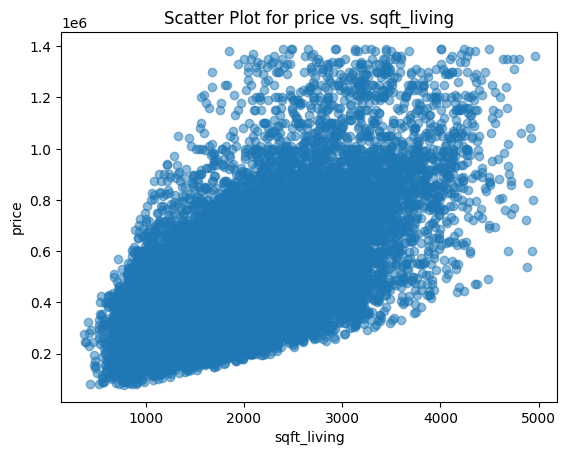

In [1429]:

# Create a scatter plot for 'sqft_living' vs. 'price'
create_bivariate_plot(filtered_df, plot_type='scatter', x_column='sqft_living', y_column='price')



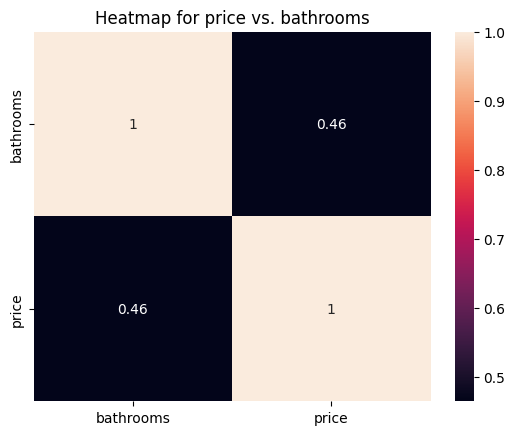

In [1430]:
# Create a scatter plot for 'bathrooms' vs. 'price'
create_bivariate_plot(filtered_df, plot_type='heatmap', x_column='bathrooms', y_column='price')


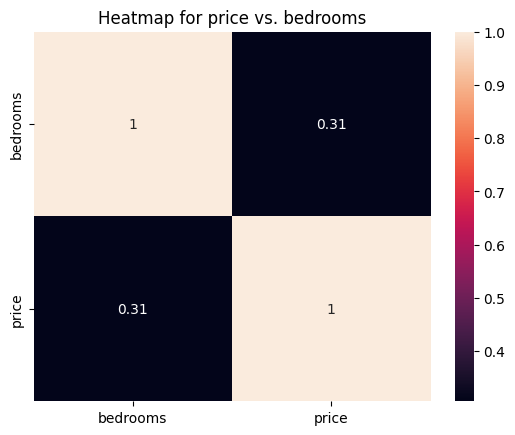

In [ ]:

# Create a scatter plot for 'bedrooms' vs. 'price'
create_bivariate_plot(filtered_df, plot_type='heatmap', x_column='bedrooms', y_column='price')


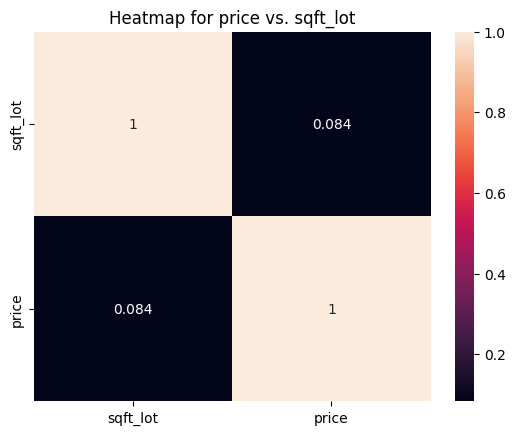

In [ ]:

# Create a scatter plot for 'sqft_lot' vs. 'price'
create_bivariate_plot(filtered_df, plot_type='heatmap', x_column='sqft_lot', y_column='price')


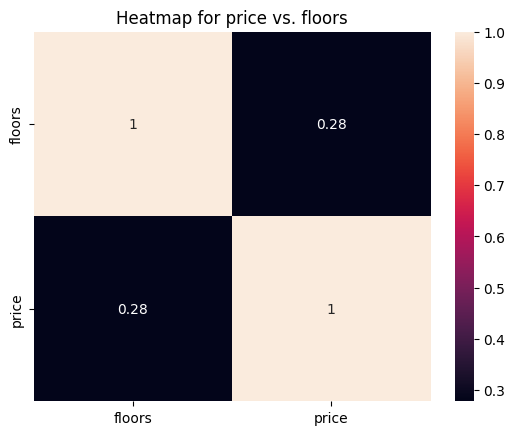

In [ ]:

# Create a scatter plot for 'floors' vs. 'price'
create_bivariate_plot(filtered_df, plot_type='heatmap', x_column='floors', y_column='price')


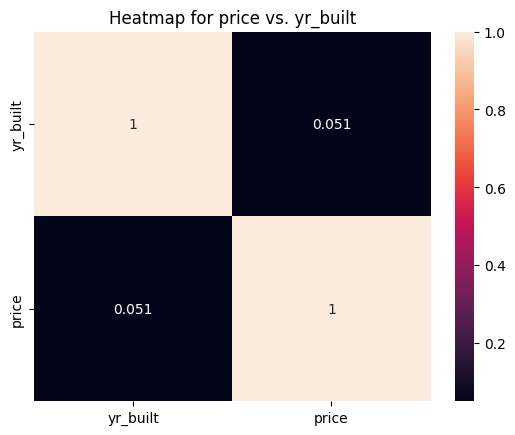

In [ ]:

# Create a scatter plot for 'sqft_living' vs. 'price'
create_bivariate_plot(filtered_df, plot_type='heatmap', x_column='yr_built', y_column='price')


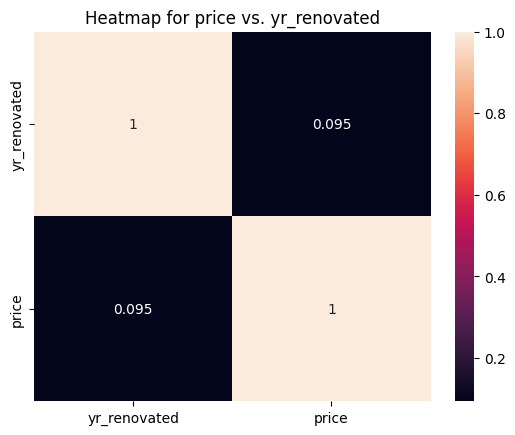

In [ ]:

# Create a scatter plot for 'yr_renovated' vs. 'price'
create_bivariate_plot(filtered_df, plot_type='heatmap', x_column='yr_renovated', y_column='price')


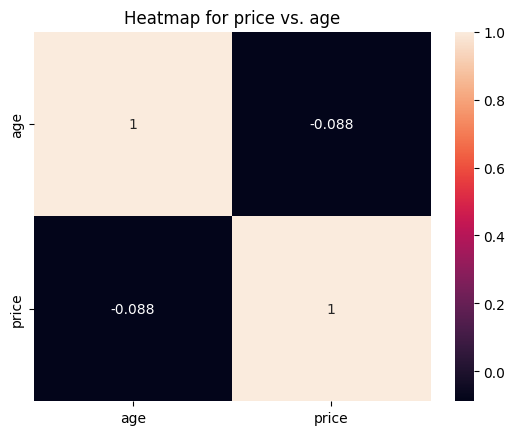

In [ ]:

# Create a scatter plot for 'age' vs. 'price'
create_bivariate_plot(filtered_df, plot_type='heatmap', x_column='age', y_column='price')


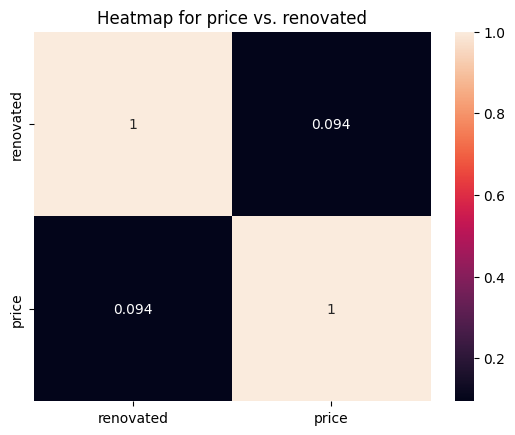

In [ ]:

# Create a scatter plot for 'sqft_living' vs. 'price'
create_bivariate_plot(filtered_df, plot_type='heatmap', x_column='renovated', y_column='price')


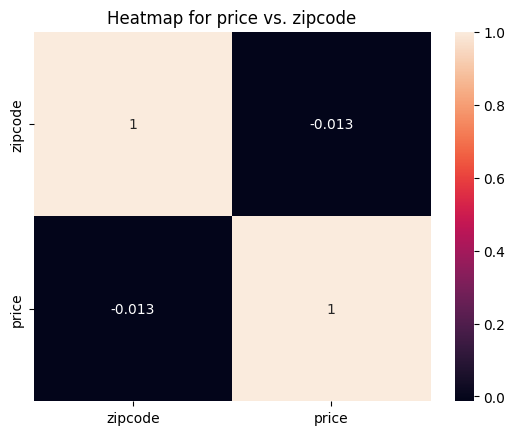

In [ ]:

# Create a scatter plot for 'sqft_living' vs. 'price'
create_bivariate_plot(filtered_df, plot_type='heatmap', x_column='zipcode', y_column='price')


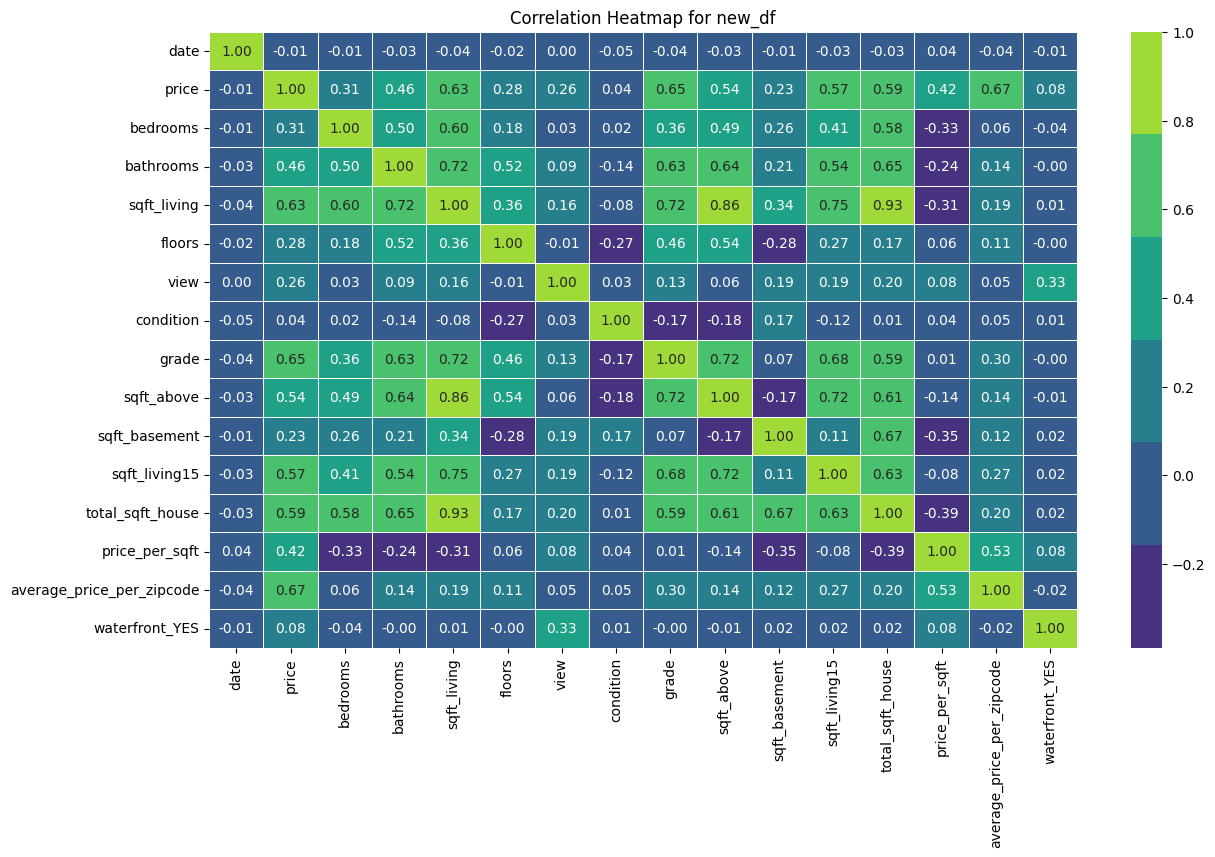

In [1431]:
# Calculate the correlation matrix
correlation_matrix = filtered_df.corr()

# Mask the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set a color palette
cmap = sns.color_palette("viridis")

# Create the heatmap
plt.figure(figsize=(14, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, cmap=cmap, annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap for new_df')

plt.show()

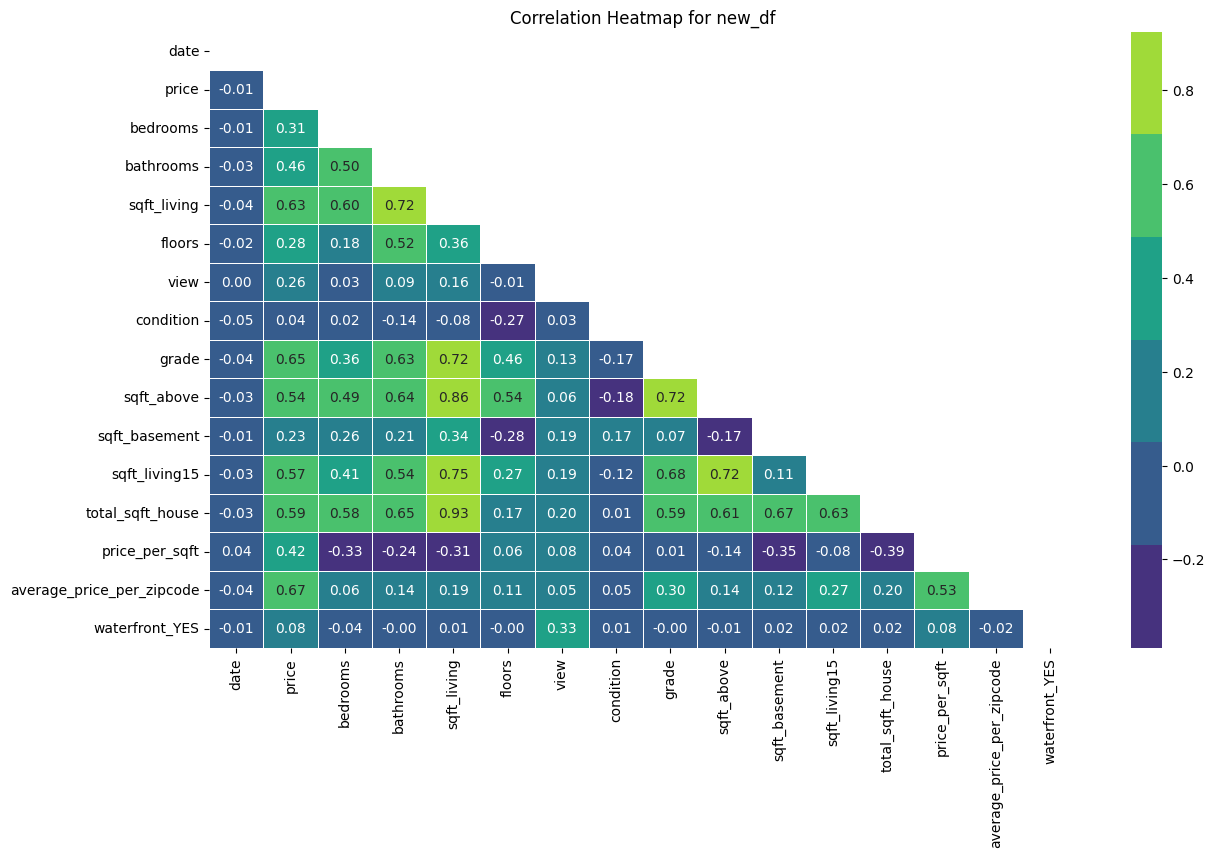

In [1432]:
# Calculate the correlation matrix
correlation_matrix = filtered_df.corr()

# Mask the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set a color palette
cmap = sns.color_palette("viridis")

# Create the heatmap
plt.figure(figsize=(14, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, cmap=cmap, annot=True, fmt=".2f",mask=mask, linewidths=0.5)
plt.title('Correlation Heatmap for new_df')

plt.show()


In [1433]:
# Calculate the correlation of 'price' with all numerical columns and sort them in descending order
price_corr = filtered_df.corr()['price'].sort_values(ascending=False)

print(price_corr)


price                        1.000000
average_price_per_zipcode    0.672127
grade                        0.646717
sqft_living                  0.634115
total_sqft_house             0.592826
sqft_living15                0.570966
sqft_above                   0.537046
bathrooms                    0.464427
price_per_sqft               0.419640
bedrooms                     0.305417
floors                       0.278848
view                         0.264629
sqft_basement                0.233439
waterfront_YES               0.084120
condition                    0.036989
date                        -0.007691
Name: price, dtype: float64


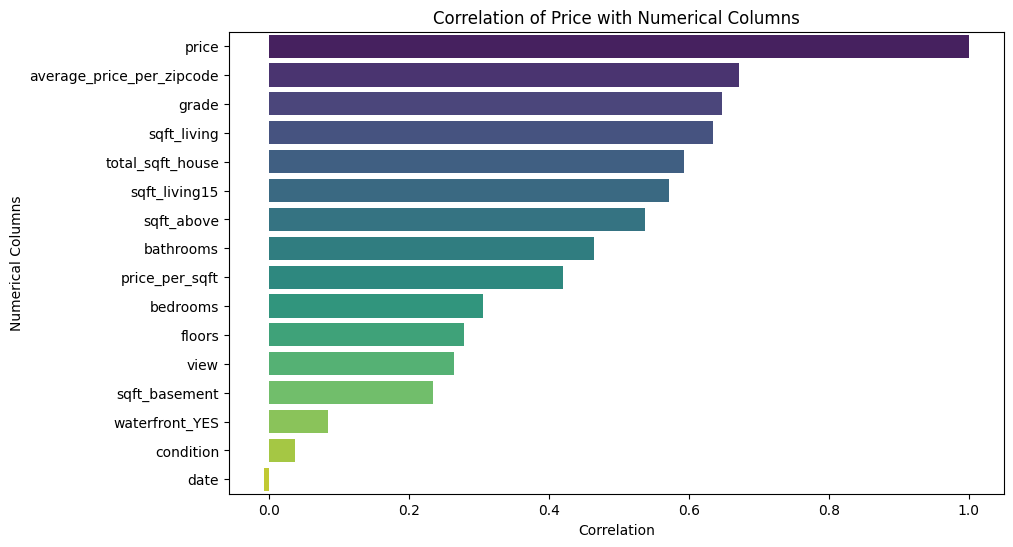

In [1434]:

# Calculate the correlation of 'price' with all numerical columns and sort them in descending order
price_corr = filtered_df.corr()['price'].sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.barplot(x=price_corr.values, y=price_corr.index, palette='viridis')
plt.xlabel('Correlation')
plt.ylabel('Numerical Columns')
plt.title('Correlation of Price with Numerical Columns')
plt.show()


### REGRESSION MODELLING
#### Creating the base model

#### From the figure above, it is clear that sqft_living has the highest correlation to the price of the house:

In [1436]:
import statsmodels.api as sm

# Add a constant to the independent variable for the intercept
X = sm.add_constant(filtered_df['average_price_per_zipcode'])

# Fit the OLS (Ordinary Least Squares) regression model
model = sm.OLS(filtered_df['price'], X).fit()

# Get model summary
summary = model.summary()

# Extract R-squared and F-statistic from the summary
r_squared = model.rsquared
f_statistic = model.fvalue

print(summary)
# print(f"R-squared: {r_squared}")
# print(f"F-statistic: {f_statistic}")


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                 1.684e+04
Date:                Fri, 27 Oct 2023   Prob (F-statistic):               0.00
Time:                        15:17:17   Log-Likelihood:            -2.7524e+05
No. Observations:               20434   AIC:                         5.505e+05
Df Residuals:                   20432   BIC:                         5.505e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [1438]:
import statsmodels.api as sm

# Define the independent variables you want to include in the model
independent_vars = [
    'average_price_per_zipcode', 'grade', 'sqft_living', 'total_sqft_house',
    'sqft_living15', 'sqft_above', 'bathrooms', 'price_per_sqft',
    'bedrooms', 'floors', 'view', 'sqft_basement', 'waterfront_YES', 'condition'
]

# Add a constant to the independent variables for the intercept
X = sm.add_constant(filtered_df[independent_vars])

# Fit the OLS (Ordinary Least Squares) regression model
model = sm.OLS(filtered_df['price'], X).fit()

# Get model summary
summary = model.summary()

# Extract R-squared and F-statistic from the summary
r_squared = model.rsquared
f_statistic = model.fvalue

# Print the model summary, R-squared, and F-statistic
print(summary)
print(f"R-squared: {r_squared}")
print(f"F-statistic: {f_statistic}")


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                 1.385e+04
Date:                Fri, 27 Oct 2023   Prob (F-statistic):               0.00
Time:                        15:20:48   Log-Likelihood:            -2.5804e+05
No. Observations:               20434   AIC:                         5.161e+05
Df Residuals:                   20420   BIC:                         5.162e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 